TASK 3: LINEAR REGRESSION

In [1]:
#Importing the required libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
data = pd.read_csv('Housing.csv')

# Display
print("Data: ")
print(data.head())


Data: 
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
print("Checking for the null data types and missing values:")
print(data.isnull().sum())

Checking for the null data types and missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


There are no missing/null  values in the dataset. As seen above 

In [4]:
# To check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
# Binary columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_cols] = data[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)


In [7]:
# For numerical columns
data = data.fillna(data.median(numeric_only=True))

# For categorical columns
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [8]:
print(" New data  after preprocessing: ")
print(data.head())

 New data  after preprocessing: 
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                        

In [9]:
X = data.drop('price', axis=1)  # Features
y = data['price']               # Target variable


In [10]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
#Training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)

# Calculating the MAE,MSE & R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 920392.9397607958
MSE: 1523019469501.2917
R²: 0.6463350878895876


In [13]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                            Feature   Coefficient
0                              area  2.532873e+02
1                          bedrooms  8.089314e+04
2                         bathrooms  1.114751e+06
3                           stories  4.172676e+05
4                          mainroad  4.080737e+05
5                         guestroom  2.757105e+05
6                          basement  4.826035e+05
7                   hotwaterheating  6.163754e+05
8                   airconditioning  6.858393e+05
9                           parking  3.031112e+05
10                         prefarea  5.091921e+05
11  furnishingstatus_semi-furnished -1.216527e+05
12     furnishingstatus_unfurnished -3.911912e+05


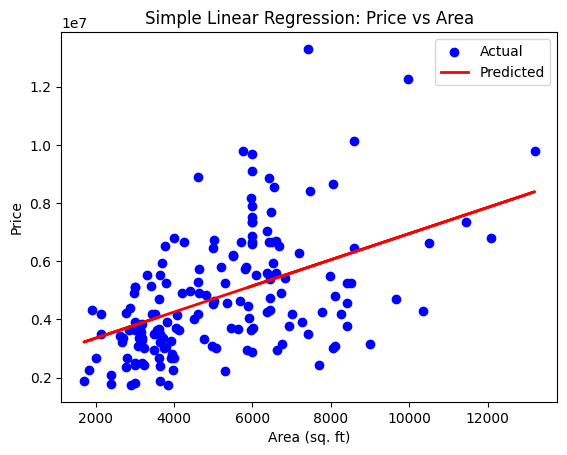

In [ ]:
# Simple regression (using 'area' as the only feature)
X_simple = data[['area']]
y_simple = data['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42
)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Plotting the results
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, model_simple.predict(X_test_s), color='red', linewidth=2, label='Predicted')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.show()


Interpretation:

Intercept: The expected value of the log-transformed price when the standardized area is zero.

Area (standardized) coefficient: For each one standard deviation increase in area, the log-transformed price increases by the value of this coefficient.

Since the price is log-transformed, a coefficient of 0.1 means that for each standard deviation increase in area, the price multiplies by 
e
0.1
≈
1.105
e 
0.1
 ≈1.105, or increases by about 10.5%.

Summary:

-The plot shows the model fit between area and price.

-The coefficients quantify how area affects the log of price, holding other factors constant.

-To get the exact coefficient values, run the print(coefficients) command after fitting your model.